In [1]:
import tradingeconomics as te
import time
import pandas as pd
import plotly.express as px

In [2]:
te.login() 


In [3]:
brazil_exports_by_categories = te.getCmtCountry('brazil', output_type='df')

In [4]:
brazil_exports_by_categories

,symbol,country1,country2,type,category,url,title,lastupdate
0,BRAKHM45042,Brazil,Cambodia,Export,Agglomerated cork,/brazil/exports/cambodia/agglomerated-cork,Brazil exports of agglomerated cork to Cambodia,2021-06-28T14:36:00
1,BRABRB00002,Brazil,Barbados,Export,None,/brazil/exports/barbados,Brazil exports to Barbados,2021-06-28T14:30:00
2,BRAKOR45042,Brazil,South Korea,Export,Agglomerated cork,/brazil/exports/south-korea/agglomerated-cork,Brazil exports of agglomerated cork to South K...,2021-06-28T12:22:00
3,BRABRN00002,Brazil,Brunei,Export,None,/brazil/exports/brunei,Brazil exports to Brunei,2021-06-28T14:30:00
4,BRALBN45042,Brazil,Lebanon,Export,Agglomerated cork,/brazil/exports/lebanon/agglomerated-cork,Brazil exports of agglomerated cork to Lebanon,2021-06-28T11:51:00
...,...,...,...,...,...,...,...,...
99995,BRAALB34072,Brazil,Albania,Export,"Modelling Pastes, Preparations Dental Was or D...",/brazil/exports/albania/modeling-pastes-childr...,"Brazil exports of modelling pastes, preparatio...",2021-07-05T12:53:00
99996,BRAEGY28422,Brazil,Egypt,Export,Other Salts of Inorganic Acids or Peroxoacids ...,/brazil/exports/egypt/salts-inorganic-acids-pe...,Brazil exports of other salts of inorganic aci...,2021-07-05T13:08:00
99997,BRAARE34072,Brazil,United Arab Emirates,Export,"Modelling Pastes, Preparations Dental Was or D...",/brazil/exports/united-arab-emirates/modeling-...,"Brazil exports of modelling pastes, preparatio...",2021-07-05T14:21:00
99998,BRAFRA28422,Brazil,France,Export,Other Salts of Inorganic Acids or Peroxoacids ...,/brazil/exports/france/salts-inorganic-acids-p...,Brazil exports of other salts of inorganic aci...,2021-07-05T13:30:00


In [5]:
brazil_total_exports= te.getTotalByType(country='brazil', type='export', output_type='df')
brazil_total_exports

,symbol,country1,country2,value,date,type,category,url,title,lastupdate
0,BRAWLD00002,Brazil,World,209180241655,2020,Export,None,/brazil/exports,Brazil exports,2021-06-28T14:30:00
1,BRACHN00002,Brazil,China,67788075211,2020,Export,None,/brazil/exports/china,Brazil exports to China,2021-06-28T14:30:00
2,BRAUSA00002,Brazil,United States,21618696854,2020,Export,None,/brazil/exports/united-states,Brazil exports to United States,2021-06-28T14:30:00
3,BRAARG00002,Brazil,Argentina,8488738068,2020,Export,None,/brazil/exports/argentina,Brazil exports to Argentina,2021-06-28T14:30:00
4,BRANLD00002,Brazil,Netherlands,6704999994,2020,Export,None,/brazil/exports/netherlands,Brazil exports to Netherlands,2021-06-28T14:30:00
...,...,...,...,...,...,...,...,...,...,...
197,BRAPLW00002,Brazil,Palau,3997,2020,Export,None,/brazil/exports/palau,Brazil exports to Palau,2021-06-28T14:30:00
198,BRABDI00002,Brazil,Burundi,698,2020,Export,None,/brazil/exports/burundi,Brazil exports to Burundi,2021-06-28T14:30:00
199,BRABTN00002,Brazil,Bhutan,386,2020,Export,None,/brazil/exports/bhutan,Brazil exports to Bhutan,2021-06-28T14:30:00
200,BRABRA00002,Brazil,Brazil,67066,2018,Export,None,/brazil/exports/brazil,Brazil exports to Brazil,2019-08-12T18:22:00


#### But we want only total exports without the pair country 1 = 'brazil' to country 2 = 'China', so we only need the row country1 = 'brazil' and country 2 = 'World'

#### But this row gives us only last export value to the world. So we have to get world exports to all countries and also historical World export to these countries. 

#### Lets see which api's endpoint has the historical world exports 

In [6]:
brasil_historical_world_exports = te.getCmtHistorical(symbol='BRAWLD00002', output_type='df')
brasil_historical_world_exports[:10]

,symbol,date,value
0,BRAWLD00002,1989-12-31T00:00:00,3.438143e+10
1,BRAWLD00002,1990-12-31T00:00:00,3.141126e+10
2,BRAWLD00002,1991-12-31T00:00:00,3.162112e+10
3,BRAWLD00002,1992-12-31T00:00:00,3.597532e+10
4,BRAWLD00002,1993-12-31T00:00:00,3.870084e+10
5,BRAWLD00002,1994-12-31T00:00:00,4.355783e+10
6,BRAWLD00002,1995-12-31T00:00:00,4.650493e+10
7,BRAWLD00002,1996-12-31T00:00:00,4.774593e+10
8,BRAWLD00002,1997-12-31T00:00:00,5.298581e+10
9,BRAWLD00002,1998-12-31T00:00:00,5.111987e+10


#### As you can see, We need a symbol to get all historical world exports of a specific country (Ex: 'BRAWLD00002')
#### So , we have to get a list of all countries symbols. Actually, before it, we have to get a list of all countries available. 
#### The correct sequence will be:
#### - List of all countries available
#### - World Export symbols for all the countries available
#### - Historical export data for all the symbols we have 

### Getting a list of all countries available

In [7]:
all_countries_available = te.getCmtCountry(output_type='df')
all_countries_available

,id,name,region,subregion,iso,year
0,0,World,None,None,WLD,None
1,10,Antarctica,None,None,ATA,2015
2,100,Bulgaria,Europe,Eastern Europe,BGR,2019
3,104,Myanmar,Asia,South-Eastern Asia,MMR,2020
4,108,Burundi,Africa,Western Africa,BDI,2019
...,...,...,...,...,...,...
285,90,Solomon Islands,Oceania,Melanesia,SLB,2018
286,92,British Virgin Islands,Americas,Caribbean,VGB,2015
287,96,Brunei,Asia,South-Eastern Asia,BRN,2019
288,97,European Union,Europe,EU-28,EU2,2020


#### We do some data treatment go get 'name' and 'iso'

In [8]:
all_countries_available_treated = all_countries_available[['name','iso']]
all_countries_available_treated = all_countries_available_treated.drop([0,288,289])

#### And also prepare a list with countries iso

In [9]:
all_countries_available_list = all_countries_available_treated['iso'].to_list()
all_countries_available_list[0:15]

['ATA',
 'BGR',
 'MMR',
 'BDI',
 'BLR',
 'KHM',
 'DZA',
 'CMR',
 'CAN',
 'CPV',
 'CYM',
 'CAF',
 'LKA',
 'TCD',
 'CHL']

#### Now, we can go for countries world export symbols endpoint and get a list of symbols. But we noticed that instead of make a request of country total export list where we can find the specific symbols to be used on the historical export request. We can use the country iso + WLD00002 and follow to the historical export request. The follow cell shows how to get the historical symbol, but we think we can skip this using the above solution presented. 

In [10]:
brazil_total_exports= te.getTotalByType(country='brazil', type='export', output_type='df')
symbol = brazil_total_exports.query('country2 == "World"')
symbol_string = (symbol['symbol'].to_list())[0]
symbol_string


'BRAWLD00002'

#### Let's create a function to do the job into all countries


#### function to get the historical world exports for a specific country

In [11]:
def get_world_exports_countries(all_countries_available_list):
    all_world_exports_country_list = []
    for country_iso in all_countries_available_list:
        symbol = f'{country_iso}WLD00002'
        try:
            country_exports = te.getCmtHistorical(symbol=symbol, output_type='df')
            all_world_exports_country_list.append(country_exports)
        except:
            pass
        
    return all_world_exports_country_list


In [12]:
my_list_of_country_historical_exports =get_world_exports_countries(all_countries_available_list) 


In [13]:
print(f'Countries historical export data acquired: {len(my_list_of_country_historical_exports)}')

Countries historical export data acquired: 201


#### Example of the acquired data

In [14]:
my_list_of_country_historical_exports[0].head()

,symbol,date,value
0,BGRWLD00002,1996-12-31T00:00:00,4.890188e+09
1,BGRWLD00002,1997-12-31T00:00:00,4.939664e+09
2,BGRWLD00002,1998-12-31T00:00:00,4.292927e+09
3,BGRWLD00002,1999-12-31T00:00:00,3.924529e+09
4,BGRWLD00002,2000-12-31T00:00:00,4.821844e+09


#### We put all the data requested at one dataframe

In [15]:

df_concat = pd.concat(my_list_of_country_historical_exports)
df_concat.tail()

,symbol,date,value
17,BRNWLD00002,2015-12-31T00:00:00,6.352662e+09
18,BRNWLD00002,2016-12-31T00:00:00,4.875075e+09
19,BRNWLD00002,2017-12-31T00:00:00,5.570575e+09
20,BRNWLD00002,2018-12-31T00:00:00,6.573637e+09
21,BRNWLD00002,2019-12-31T00:00:00,7.039083e+09


#### Now we can use a function to interate through the dataframe and separate the data by years. 

In [16]:

def get_top10_year_country_export(df_concat,position):
    years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
    top10_list_by_year = {}
    list_of_top10 = []
    for year in years:
        datetime = f'{year}-12-31T00:00:00'
        df = df_concat.query(f'date=="{datetime}"').sort_values(by=['value'],ascending=False).head(position).reset_index(drop=True)
        top10_list_by_year[f'{year}']=df
    return top10_list_by_year
        
    

#### running the function

In [17]:
top10_by_year = get_top10_year_country_export(df_concat,20)

#### Out dataframe do not have the country name 

In [18]:
top10_by_year['2015'].head()

,symbol,date,value
0,CHNWLD00002,2015-12-31T00:00:00,2.281856e+12
1,USAWLD00002,2015-12-31T00:00:00,1.501846e+12
2,DEUWLD00002,2015-12-31T00:00:00,1.328500e+12
3,JPNWLD00002,2015-12-31T00:00:00,6.248735e+11
4,KORWLD00002,2015-12-31T00:00:00,5.268972e+11


#### Treating the dataframe so we have country name 

In [19]:
def get_country_name(timeseries_iso):
    
    all_countries_available = te.getCmtCountry(output_type='df')
    all_countries_available_treated = all_countries_available[['name','iso']]
    all_countries_available_treated = all_countries_available_treated.drop([0,288,289])
    country_name_and_iso_dct = {}
    country_name_list = all_countries_available_treated['name'].to_list()
    country_iso_list = all_countries_available_treated['iso'].to_list()
    i = 0
    for country_iso in country_iso_list:
        country_name_and_iso_dct[f'{country_iso}']=f'{country_name_list[i]}'
        i+=1
    timeseries_iso_to_list = timeseries_iso.to_list()
    a_time_series_list = []
    for iso in timeseries_iso_to_list:
        a_time_series_list.append(country_name_and_iso_dct[f'{iso}'])
    timeseries_country_name = pd.Series(a_time_series_list)
    
    return timeseries_country_name

def treat_dataframe_for_country_name(dataframe_dict):
        for dataframe in dataframe_dict.values():
            dataframe['country_iso']= dataframe['symbol'].str.replace("WLD00002", "", case=False, regex=True)
            dataframe['country_name'] = get_country_name(dataframe['country_iso'])
        return dataframe_dict


In [20]:
treated_top10_by_year=treat_dataframe_for_country_name(top10_by_year)

## 2 - Now that we have a list of dataframe ready to plot we pass to DATA INVESTIGATION

In [33]:

def plot(df_dict):
    
    for year in df_dict.keys():
        fig = px.bar(df_dict[year], y='country_name', x='value', text='value', title=f'Top 10 Country Export {year}')
        fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
        fig.update_layout(width=700, height=500, uniformtext_minsize=8, uniformtext_mode='hide')
        fig.show(renderer='plotly_mimetype')
        

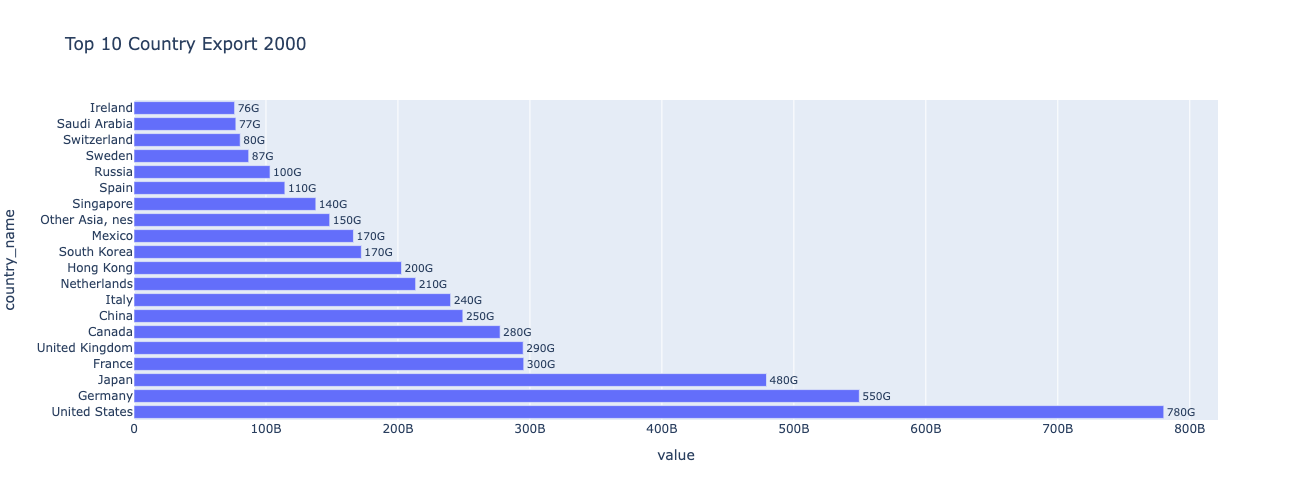

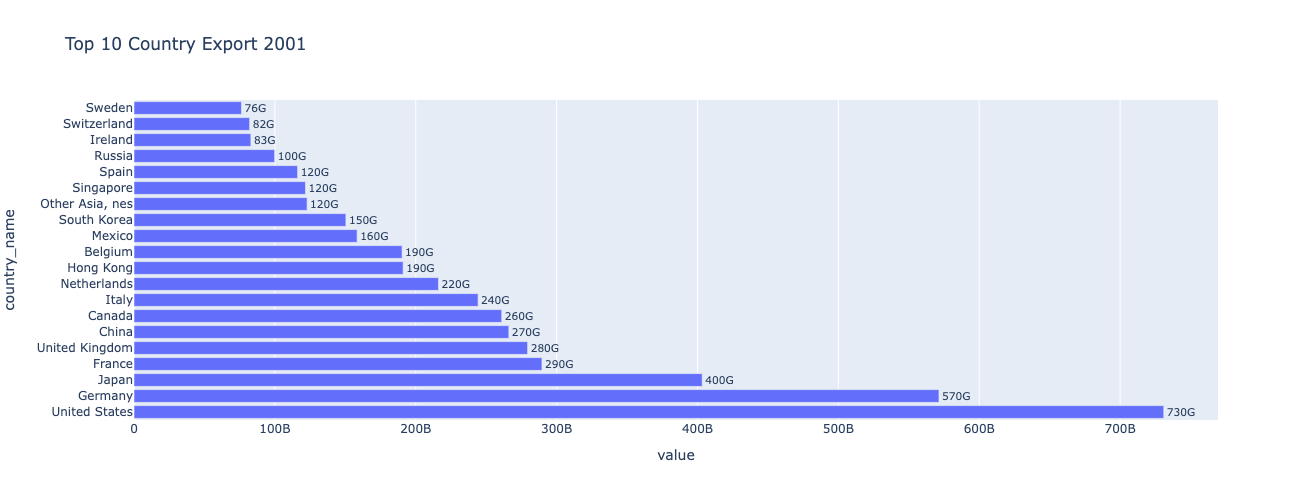

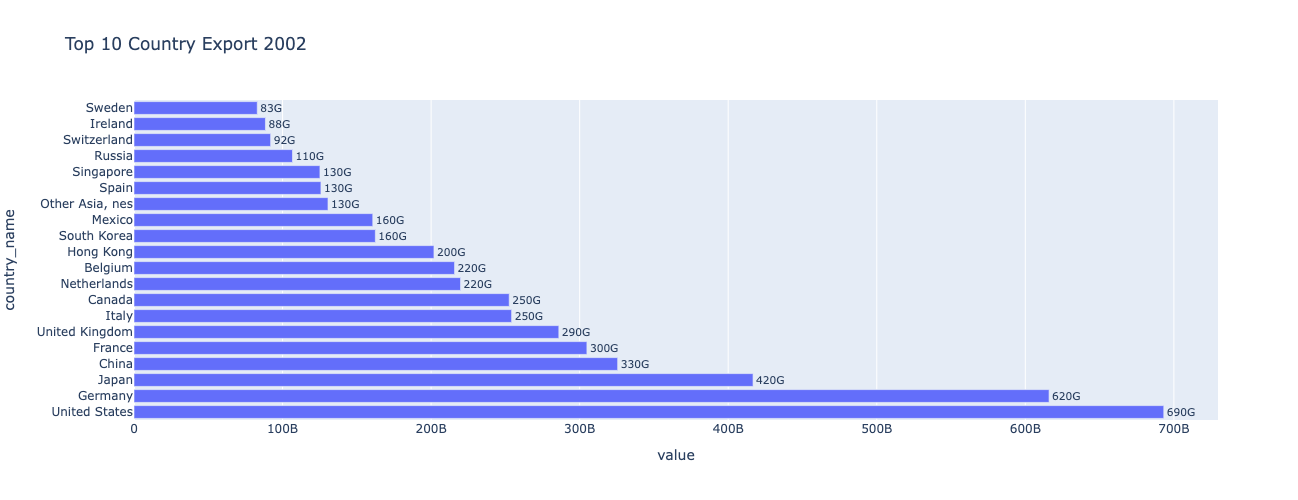

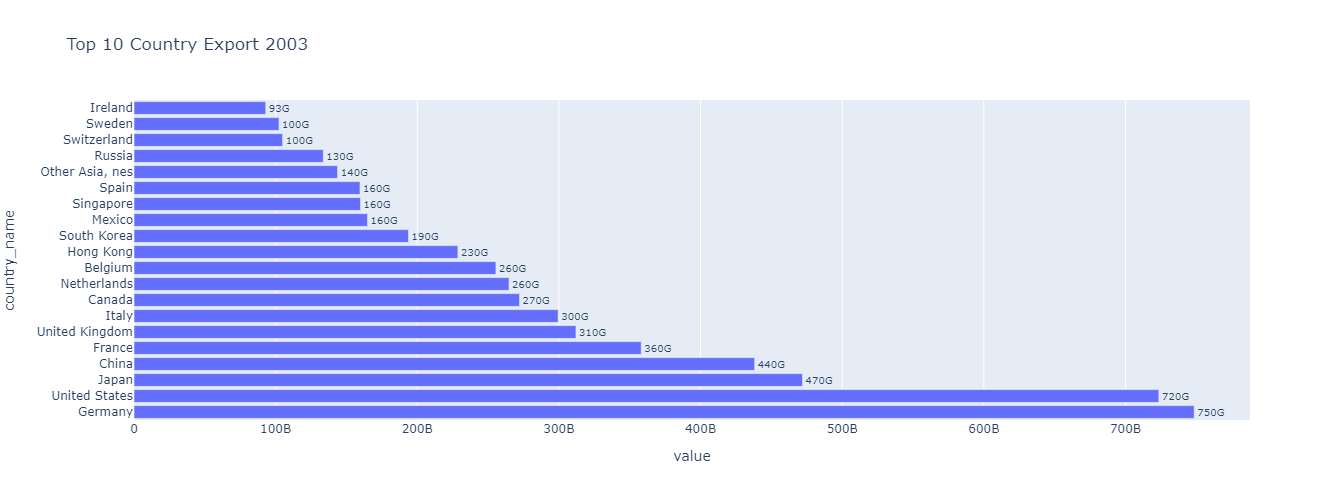

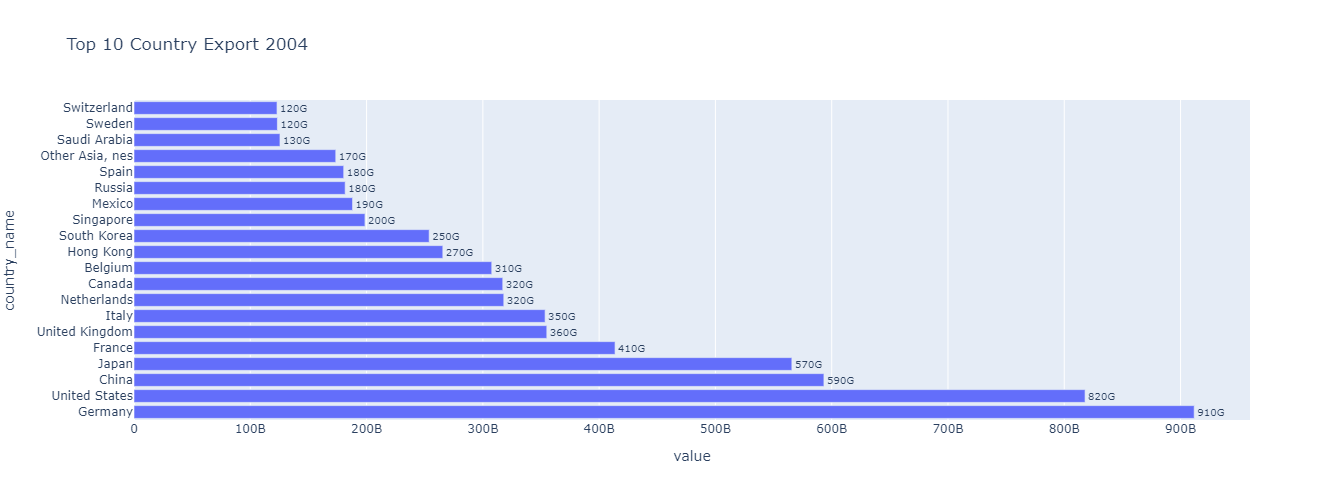

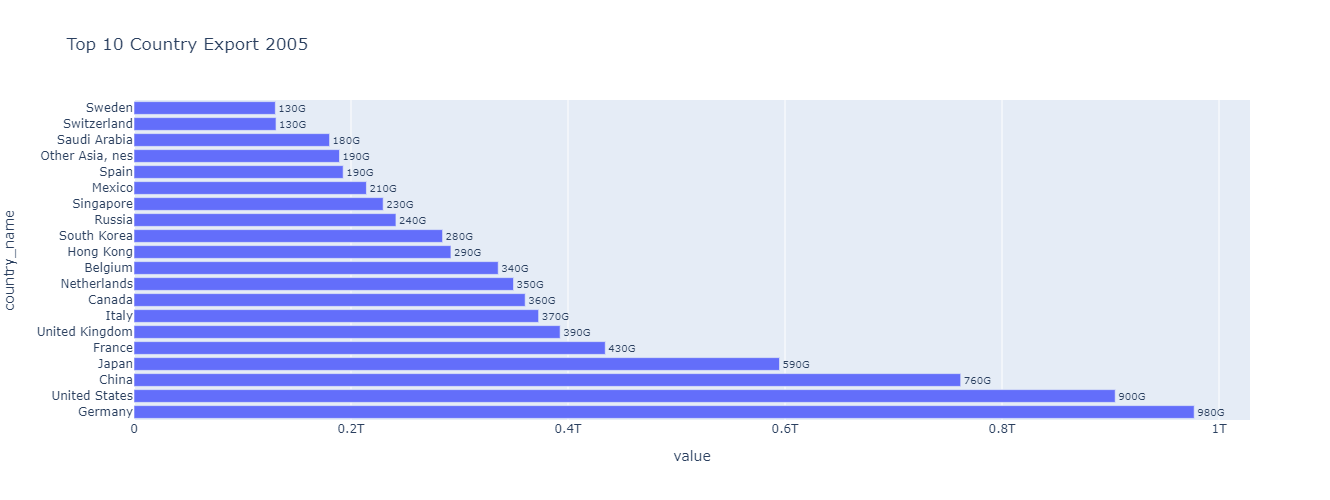

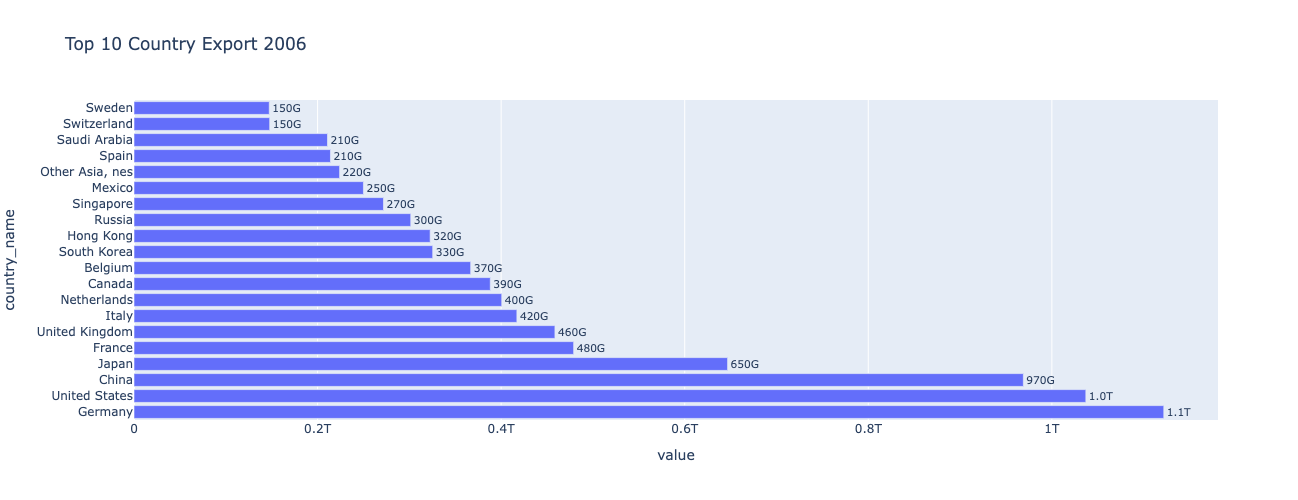

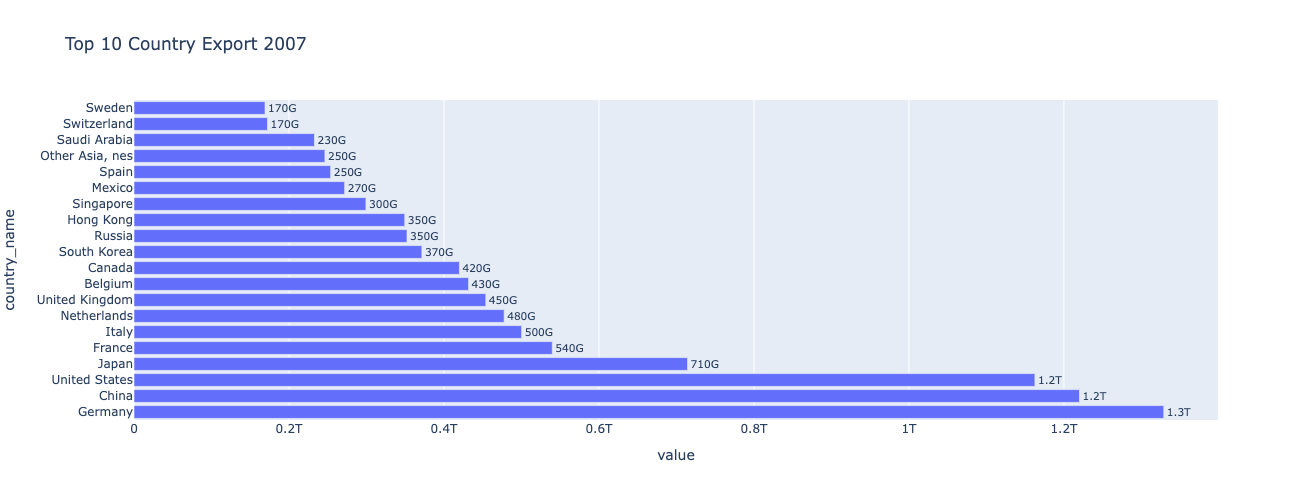

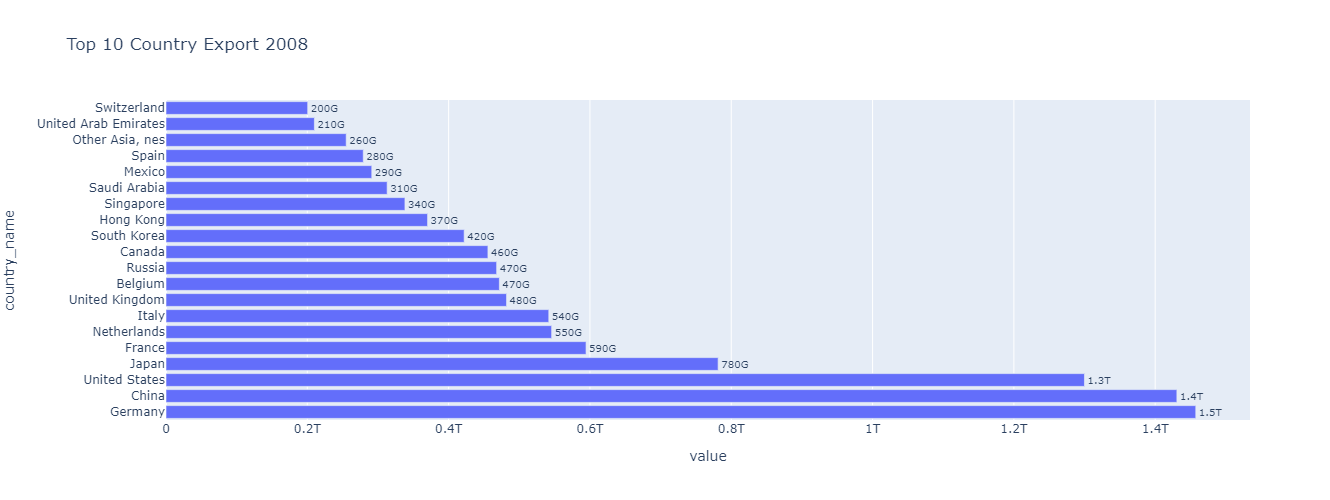

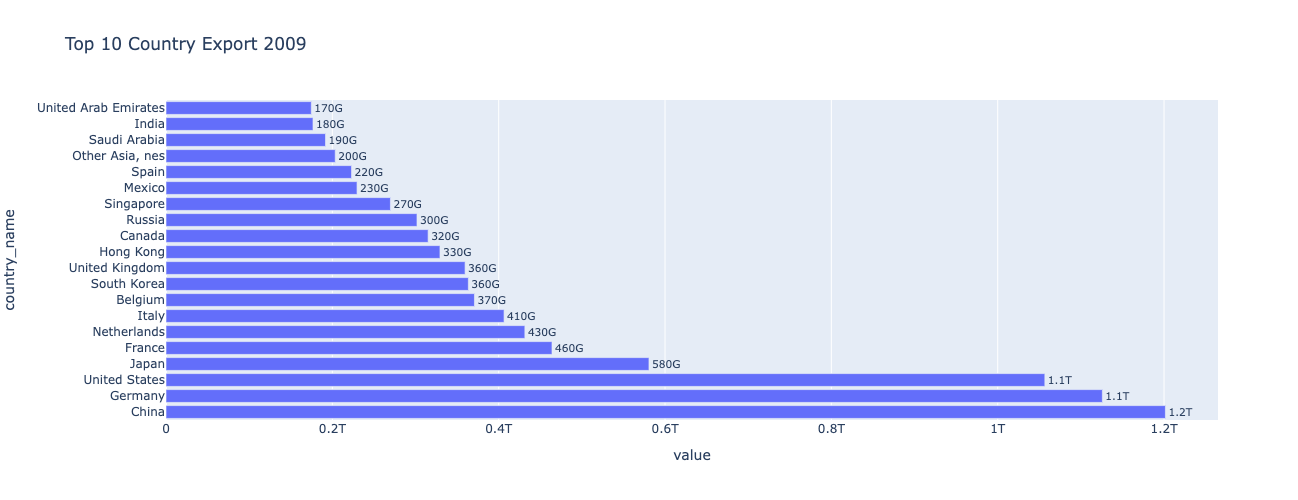

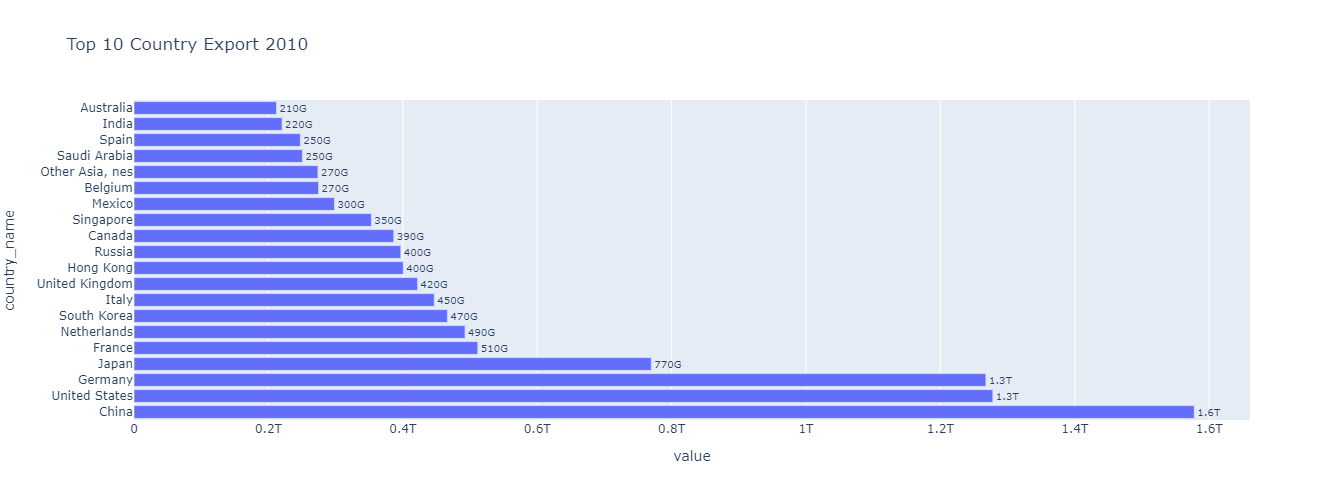

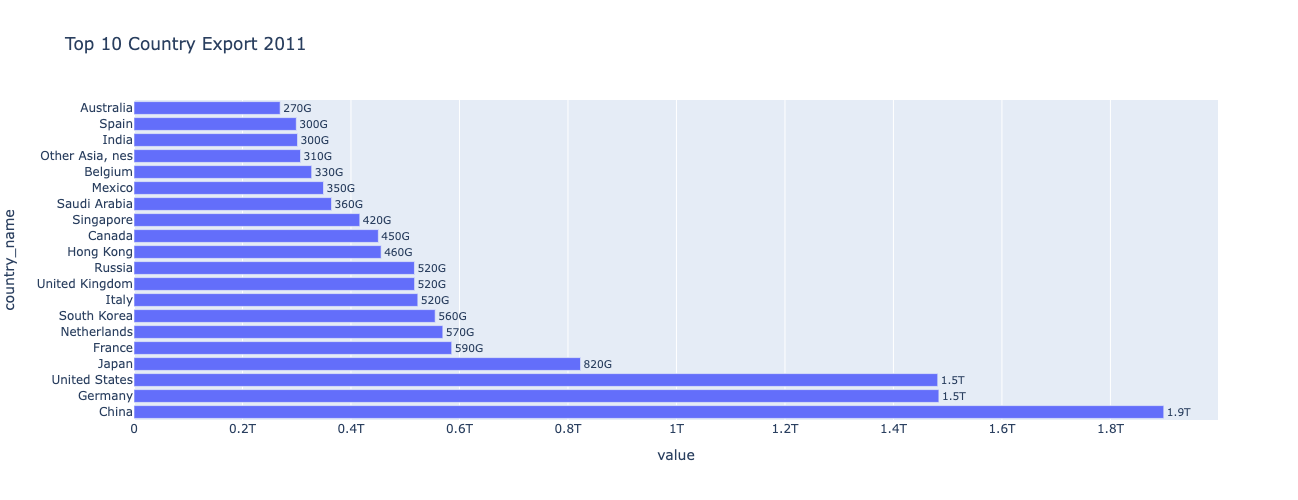

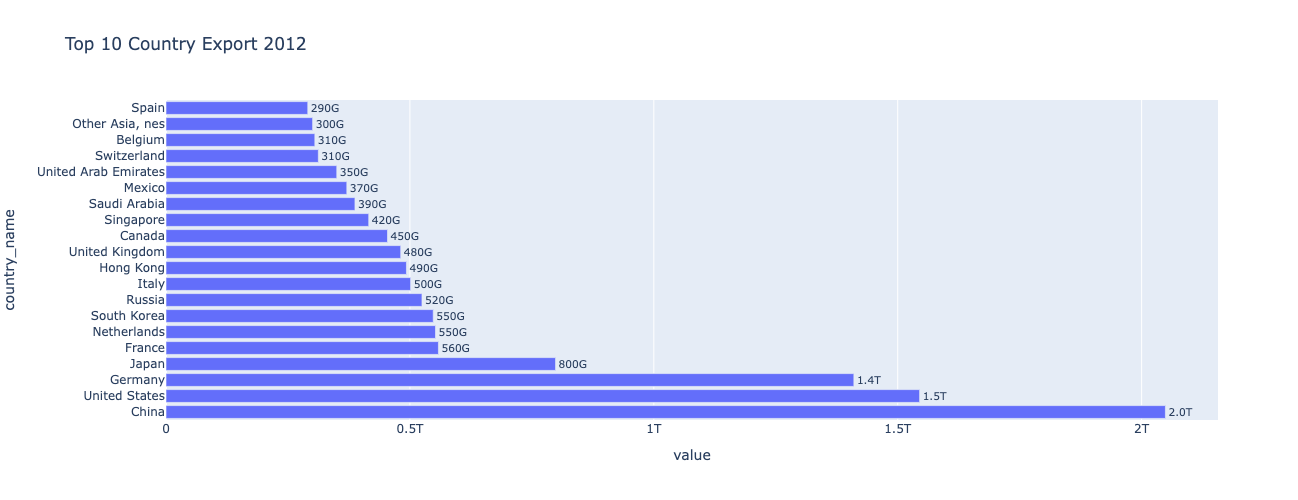

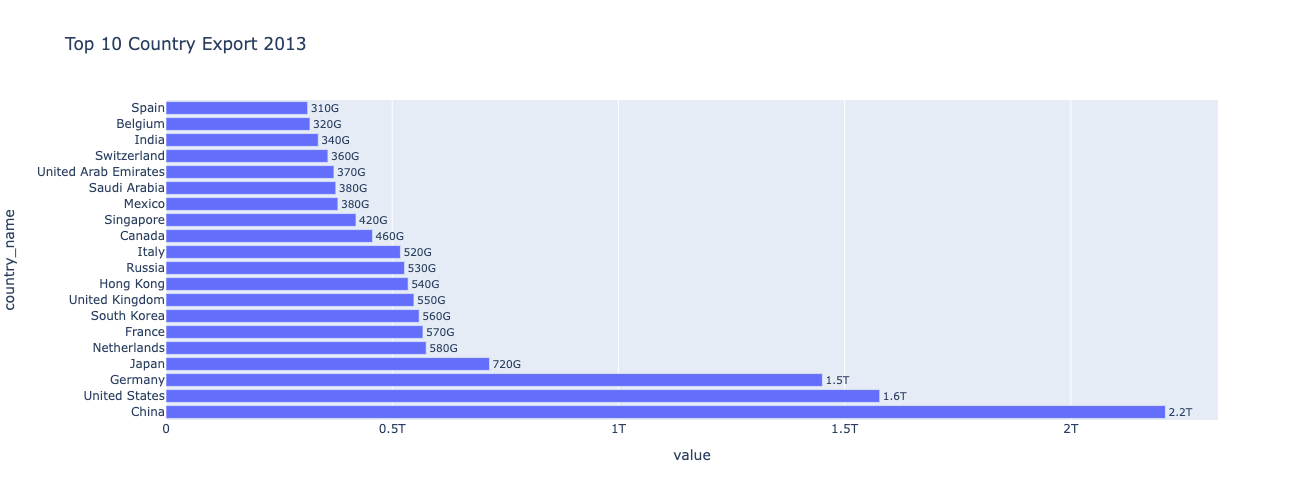

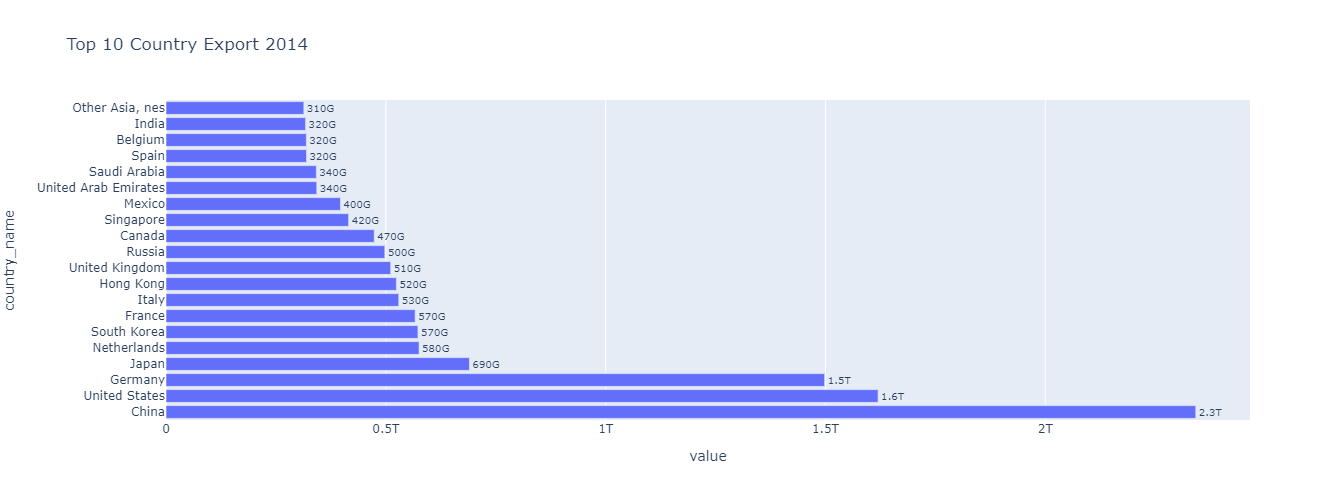

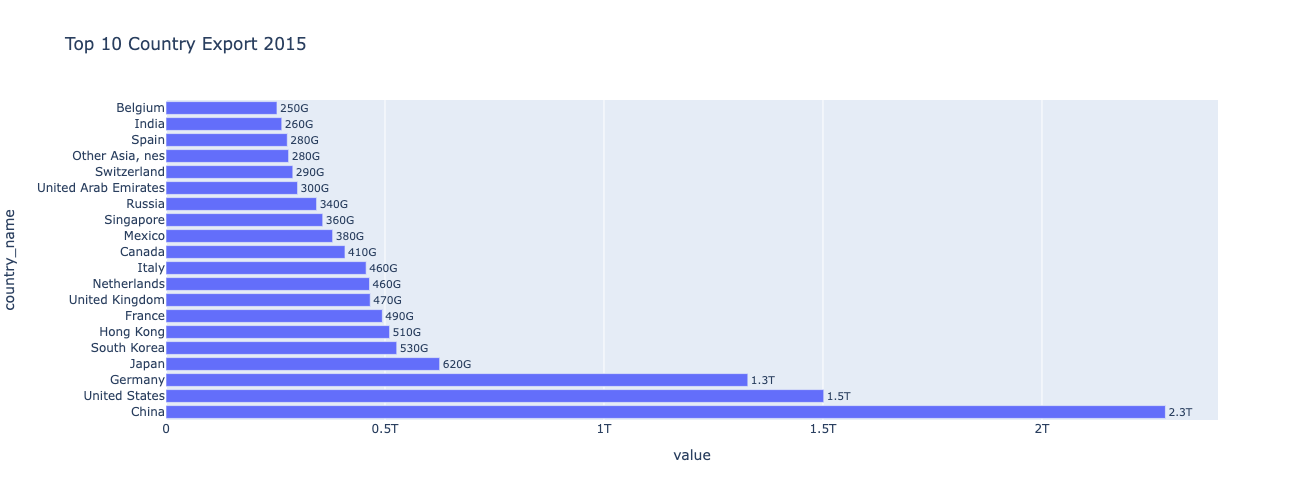

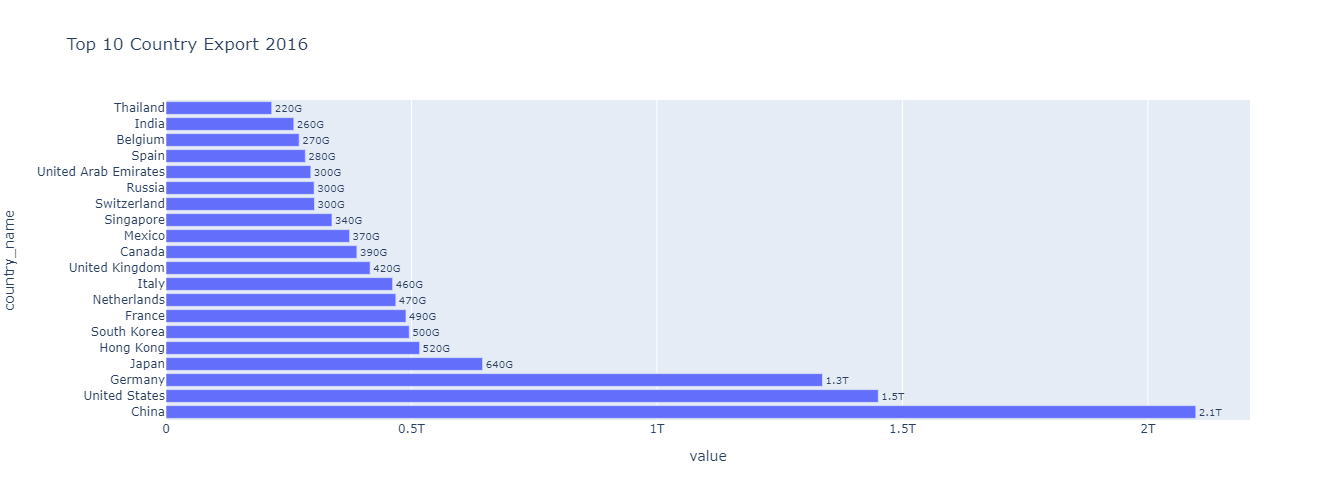

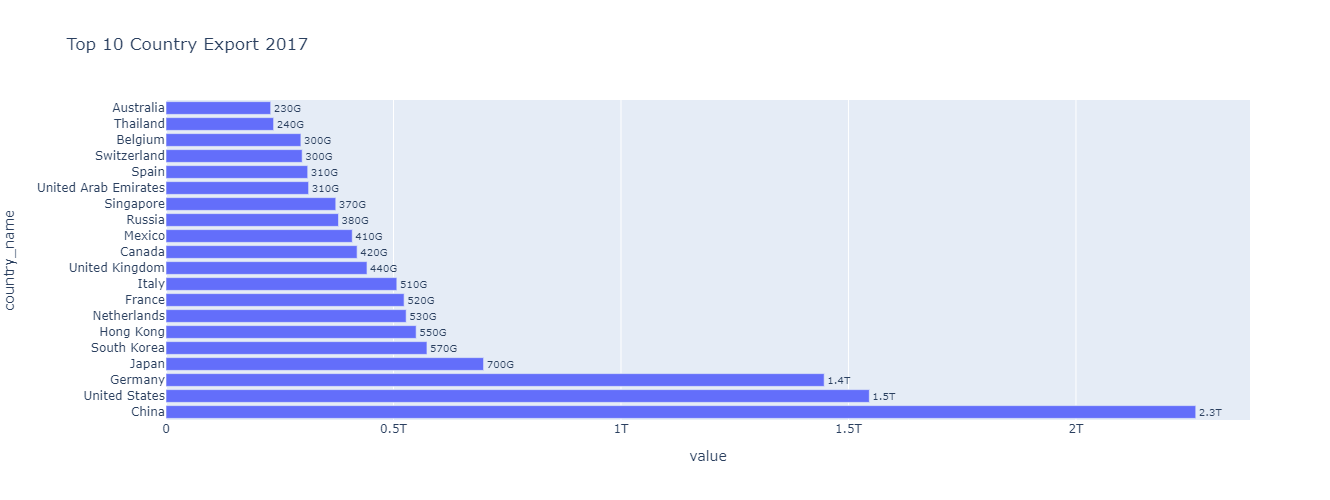

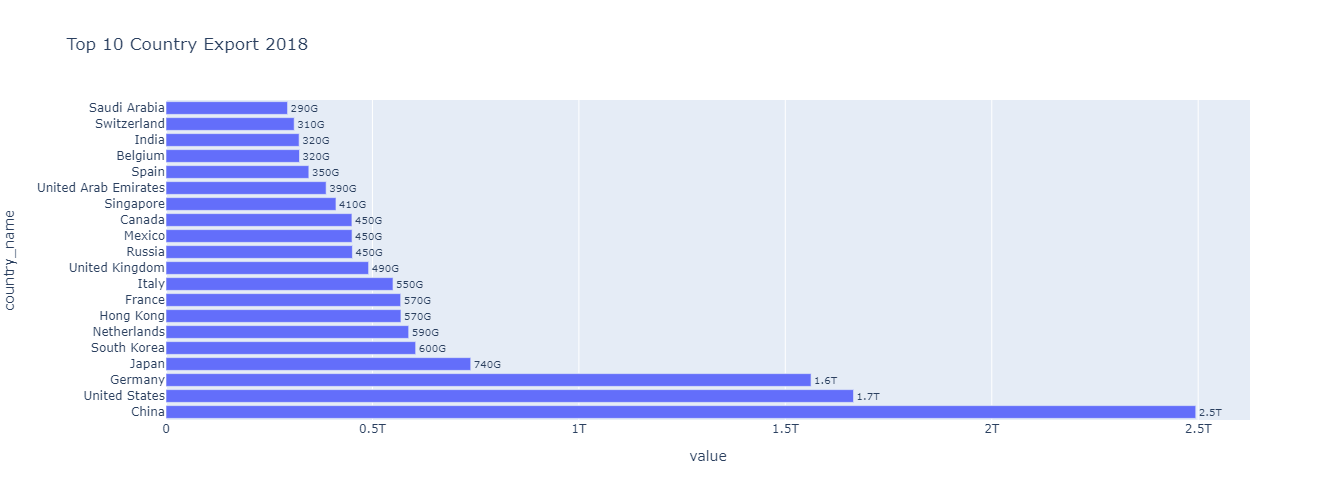

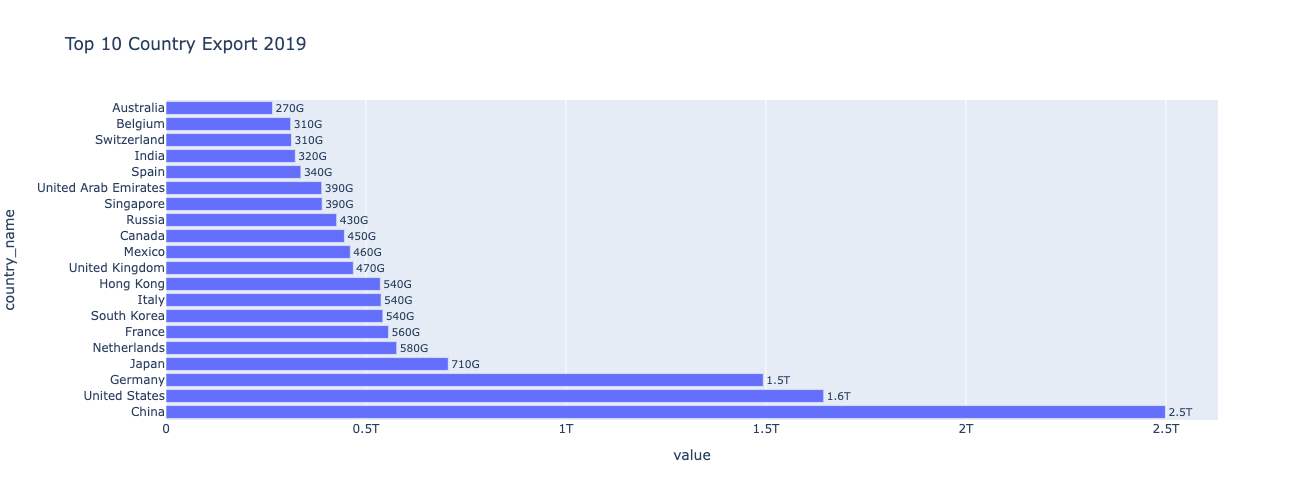

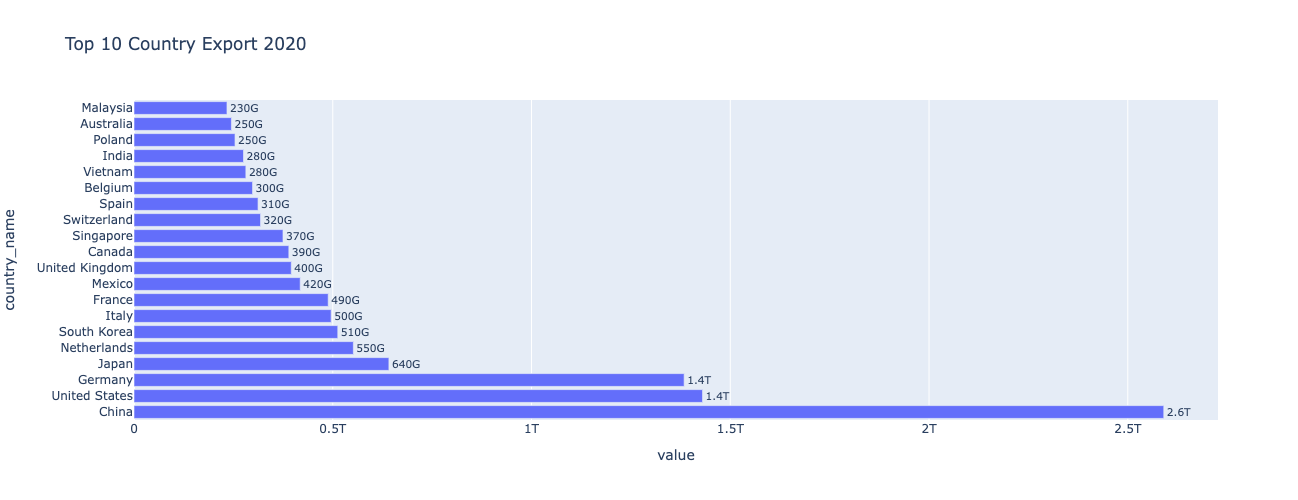

In [34]:
plot(treated_top10_by_year)

## 3 - Questions

#### Which countries are on the list from 2000 to 2020?

In [23]:
total_list = []
for dataframe in treated_top10_by_year.values():
    
    country_list= dataframe['country_name'].to_list()
    for country in country_list:
        total_list.append(country)

counter_list =[]
country_count_dict ={}
for item in total_list:
#     print(item)
    if item not in counter_list:
        counter_list.append(item)
#         print(f'Country  {item} : {total_list.count(item)}')
        country_count_dict[item] = str(total_list.count(item))
i = 1   
for item in country_count_dict.items():
    
    if item[1] == '21':
        print(f'{i} - {item[0]}')
    i+=1 
# country_count_dict
    
    

1 - United States
2 - Germany
3 - Japan
4 - France
5 - United Kingdom
6 - Canada
7 - China
8 - Italy
9 - Netherlands
11 - South Korea
12 - Mexico
14 - Singapore
15 - Spain


##### Of the twenty positions listed, fifteen countries have been present since 2000. 
##### In a certain sense, it is possible to say that economic positions continue to reflect historical configurations
##### that took place in much earlier years. And that the entry of young nations into the economic scene can be a naive expectation.
##### World historical events, such as 1st and 2nd World Wars, the cold war, people's revolution in China, etc., still show heavy effects of the current economic organization.


#### The China Ascension
##### China was at 7th position in 2000 and got the 1st position in 2009. And in 2010 it significantly distanced itself from the other places, the United States and Germany.
##### It is known that this evolution on the part of China brought concern to the United States, which led exports in the year 2000, with a good distance in relation to Germany. 
##### We are witnessing a strong economic battle, especially during the Trump administration to try to contain China's participation in the world economy.
##### And to the dismay of nations that are always in the top positions, China is nearly double the imports of its competitors.

#### Which Countries were on the list in 2000 and are not anymore on 2020?


In [24]:
countries_list_2000  = treated_top10_by_year['2000'].country_name.to_list()
countries_list_2020  = treated_top10_by_year['2020'].country_name.to_list()

countries_out_of_2020 = []

for country in countries_list_2000:
    if country not in countries_list_2020:
        countries_out_of_2020.append(country)
print(countries_out_of_2020)
        

['Hong Kong', 'Other Asia, nes', 'Russia', 'Sweden', 'Saudi Arabia', 'Ireland']


#### Which Countries were not on the list in 2000 and are now in 2020?


In [25]:
countries_in_2020 = []
for country in countries_list_2020:
    if country not in countries_list_2000:
        countries_in_2020.append(country)
print(countries_in_2020)

['Belgium', 'Vietnam', 'India', 'Poland', 'Australia', 'Malaysia']


#### Considering the countries that have entered, what is the biggest export product?

In [26]:
for country in countries_in_2020:
    main_export_product = te.getCmtCountryByCategory(country = country, type = 'export', category = None, output_type = 'df' )
    main_export_product= main_export_product.sort_values(by=['value'], ascending=False)[:1]['category'].to_string()
    print(f'{country} : {main_export_product[5:]}')
    

Belgium : Pharmaceutical products
Vietnam : Electrical, electronic equipment
India : Mineral fuels, oils, distillation products
Poland : Machinery, nuclear reactors, boilers
Australia : Ores slag and ash
Malaysia : Electrical, electronic equipment


#### Considering the top 20 countries with the highest export, which product is the biggest export?

In [27]:
list_of_product = []
for country in countries_list_2020:
    main_export_product = te.getCmtCountryByCategory(country = country, type = 'export', category = None, output_type = 'df' )
    main_export_product= main_export_product.sort_values(by=['value'], ascending=False)[:1]['category'].to_string()
    list_of_product.append(main_export_product[5:])
    print(f'{country} : {main_export_product[5:]}')

China : Electrical, electronic equipment
United States : Machinery, nuclear reactors, boilers
Germany : Machinery, nuclear reactors, boilers
Japan : Vehicles other than railway, tramway
Netherlands : Machinery, nuclear reactors, boilers
South Korea : Electrical, electronic equipment
Italy : Machinery, nuclear reactors, boilers
France : Machinery, nuclear reactors, boilers
Mexico : Vehicles other than railway, tramway
United Kingdom : Machinery, nuclear reactors, boilers
Canada : Mineral fuels, oils, distillation products
Singapore : Electrical, electronic equipment
Switzerland : Pharmaceutical products
Spain : Vehicles other than railway, tramway
Belgium : Pharmaceutical products
Vietnam : Electrical, electronic equipment
India : Mineral fuels, oils, distillation products
Poland : Machinery, nuclear reactors, boilers
Australia : Ores slag and ash
Malaysia : Electrical, electronic equipment


### What is the most exported product among the 20 largest exporting countries?

In [28]:
counter_list =[]
list_of_product_dict ={}
for item in list_of_product:
#     print(item)
    if item not in counter_list:
        counter_list.append(item)
#         print(f'Country  {item} : {total_list.count(item)}')
        list_of_product_dict[item] = str(list_of_product.count(item))
i = 1   
dict(sorted(list_of_product_dict.items(), key=lambda item: item[1]))

{'Ores slag and ash': '1',
 'Mineral fuels, oils, distillation products': '2',
 'Pharmaceutical products': '2',
 'Vehicles other than railway, tramway': '3',
 'Electrical, electronic equipment': '5',
 'Machinery, nuclear reactors, boilers': '7'}

#### These questions help us to understand how countries that seek to stand out in export values are economically positioned. 
#### The results obtained reinforce the constant commitment of countries with higher export values in value-added products. 
#### We can even see that countries that are historically great exporters of agricultural products do not figure in this table of the 20 largest exporters.

In [ ]:
# tennessee.matos@tradingeconomics.com 